## ****SaaS Sales****

# *Latar Belakang*

SaaS, perusahaan asal Amerika Serikat di bidang produksi software, ingin mengetahui strategi marketing yang efektif. Perusahaan ini sudah merambah pasar internasional dengan pelanggan dari berbagai negara. Perusahaan ini telah melakukan banyak strategi marketing, namun belum mengetahui apakah strategi marketing dalam hal budgeting yang dilakukan itu sudah tepat atau belum. Perusahaan ingin agar anggaran untuk marketing dapat dipergunakan secara optimal.

# *Rumusan Masalah*

1. Perusahaan ingin mengetahui keterkaitan antara GDP per Capita dengan jumlah Sales
2. Perusahaan ingin mengetahui apakah perusahaan telah mencapai economies of scale melalui keterkaitan
antara produk terjual dengan pengeluaran
3. Perusahaan ingin mengetahui apakah perusahaan perlu untuk memfokuskan penjualan pada subregion tertentu
saja melalui budget untuk marketing.
4. Perusahaan ingin mengetahui apakah industri dan produk terjual saling terkait.

## *Data*

Dalam upaya untuk menyelesaikan rumusan masalah diatas, saya akan menganalisa data yang tersedia di file csv

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini terdiri dari informasi mengenai penjualan produk-produk SaaS yang berasal dari berbagai negara dan perusahaan. Terdapat 19 kolom didalam dataset Saas-Sales, yaitu
1. Row ID           : identifikator unik untuk setiap transaksi
2. Order ID         : identifikator unik untuk setiap pemesanan
3. Order Date       : tanggal dimana pemesanan dilakukan
4. Date Key         : representasi numerik dari tanggal pemesanan (YYYY/MM/DD)
5. Contact Name     : nama orang yang melakukan pemesanan
6. Country          : negara dimana pemesanan dilakukan
7. City             : kota dimana pemesanan dilakukan
8. Region           : region dimana pemesanan dilakukan
9. Subregion        : subregion dimana pemesanan dilakukan
10. Customer        : nama perusahaan yang melakukan pemesanan
11. Customer ID     : identifikator unik untuk setiap customer
12. Industry        : industri dimana perusahaan bergerak
13. Segment         : segmen perusahaan (SMB, Strategic, Enterprise)
14. Product         : nama produk yang dipesan
15. License         : nomor lisensi untuk produk yang dipesan
16. Sales           : jumlah penjualan untuk transaksi tersebut
17. Quantity        : jumlah item produk untuk transaksi terkait
18. Discount        : besaran diskon yang diberikan untuk setiap transaksi
19. Profit          : Keuntungan untuk setiap transaksi

In [9]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Sebelum melakukan proses analisis, saya mengenali dataset yang saya terima lebih mendalam dalam tahapan data understanding. Pada proses ini, saya akan mengetahui penyimpangan-penyimpangan apa saja yang terdapat didalam dataset yang diberikan dan perlu diatasi pada tahapan data cleaning. Setiap pengendalian penyimpangan yang dilakukan, akan diikuti dengan penekanan langkah yang ditempuh, baik secara domain knowledge maupun secara statistik. Penghapusan outlier juga dilakukan agar proses analisis data menjadi lebih akurat. Serta, penghapusan kolom yang irelevan juga dilakukan. Mari lihat informasi dari dataset SaaS-Sales.csv

In [10]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

Jumlah baris terdapat 9994 baris dan 18 kolom.
Berikut adalah deskripsi dari df

In [11]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Data unik setiap kolom diidentifikasi melalui kodingan dibawah ini.

In [12]:
# Data unik di tiap kolom
daftar = []
for kolom in df.columns :
    daftar.append( [kolom, df[kolom].nunique(), df[kolom].unique()])

tabel1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=daftar)
tabel1

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Saya ingin mengetahui apakah terdapat data kosong didalam csv yang diberikan dengan cara menggunakan isna().sum()

In [13]:
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Berdasarkan pengujian missing value, tidak terdapat missing value pada setiap kolom.

Saya ingin mengetahui apakah terdapat data duplikat didalam csv yang diberikan dengan cara menggunakan duplicated().unique()

In [14]:
df.duplicated().unique()

array([False])

Berdasarkan pengujian duplicated value, tidak terdapat duplicate value didalam dataframe.

In [15]:
df.drop(columns=['Order Date', 'Row ID', 'Contact Name', 'Order ID', 'Customer ID', 'License'], inplace=True)

Kolom 'Order Date', 'Row ID', 'Contact Name', 'Order ID', 'Customer ID', dan 'License' dianggap tidak kontributif terhadap proses analisis nantinya, sehingga saya memutuskan untuk menghapus kolom-kolom tersebut.

**Pengecekan WhiteSpace sebelum dan sesudah object**

In [16]:
print(df['Country'].str.startswith(' ').unique())
print(df['Country'].str.endswith(' ').unique())
print(df['City'].str.startswith(' ').unique())
print(df['City'].str.endswith(' ').unique())
print(df['Region'].str.startswith(' ').unique())
print(df['Region'].str.endswith(' ').unique())
print(df['Subregion'].str.startswith(' ').unique())
print(df['Subregion'].str.endswith(' ').unique())
print(df['Customer'].str.startswith(' ').unique())
print(df['Customer'].str.endswith(' ').unique())
print(df['Industry'].str.startswith(' ').unique())
print(df['Industry'].str.endswith(' ').unique())
print(df['Segment'].str.startswith(' ').unique())
print(df['Segment'].str.endswith(' ').unique())
print(df['Product'].str.startswith(' ').unique())
print(df['Product'].str.endswith(' ').unique())

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


Tidak ada whitespaces yang ditemukan sebelum dan sesudah objek pada kolom manapun

## **Penanganan Outliers**

Outliers diatasi dengan cara dihapus. Penghapusan outlier penting untuk membuat proses analisis menjadi lebih akurat. Berikut adalah langkah-langkah penanganan outliers.

In [17]:
# cek distribusi kolom sales
from scipy.stats import normaltest
stats, pval=normaltest(df['Sales'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

tidak normal


Distribusi data dinyatakan tidak normal.

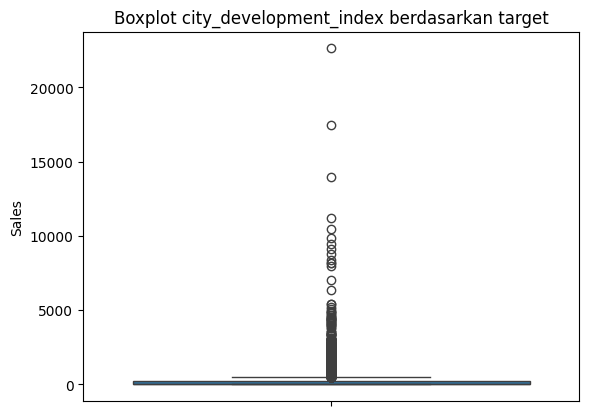

In [18]:
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

Proses penanganan outliers dilakukan melalui iterasi. Iterasi dilakukan karena outliers baru akan terbentuk ketika outliers sebelumnya dihapus.

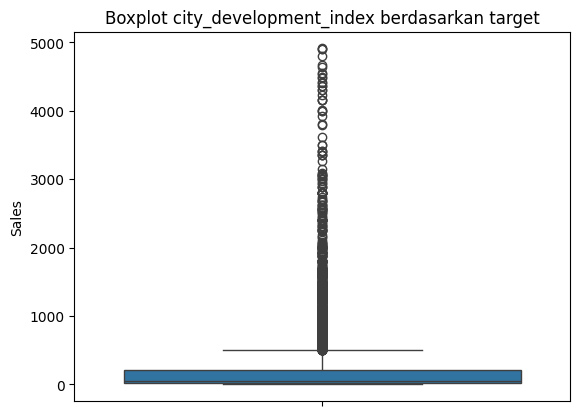

In [19]:
# identify outliers
threshold = 5000
outliers = df[(df['Sales'] > threshold)]
df = df.drop(outliers.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

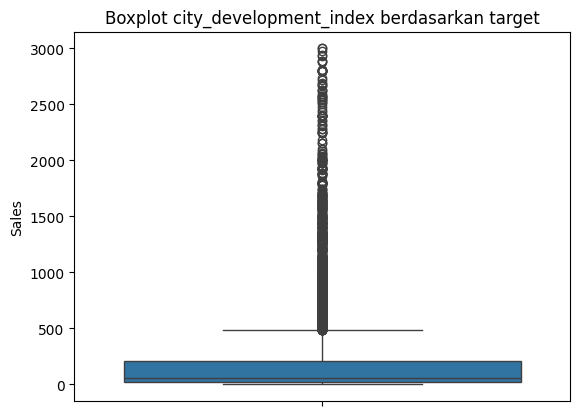

In [20]:
threshold1 = 3000
outliers1 = df[(df['Sales'] > threshold1)]
df = df.drop(outliers1.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

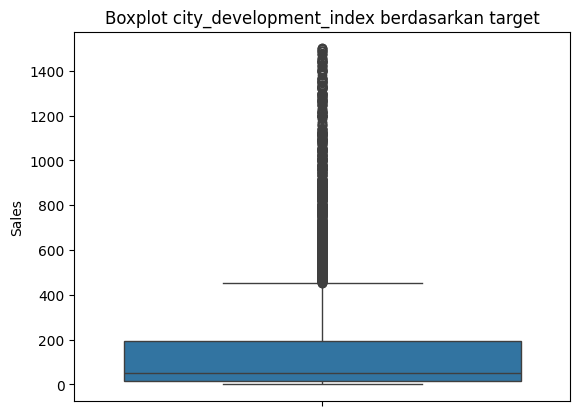

In [21]:
threshold2 = 1500
outliers2 = df[(df['Sales'] > threshold2)]
df = df.drop(outliers2.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

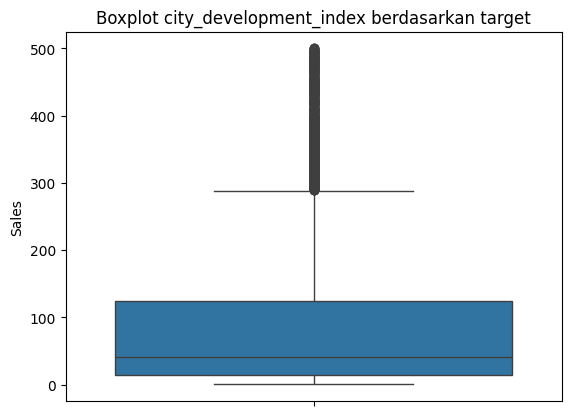

In [22]:
threshold3 = 500
outliers3 = df[(df['Sales'] > threshold3)]
df = df.drop(outliers3.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

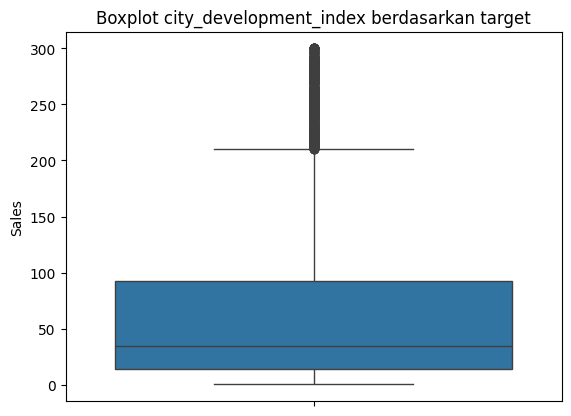

In [23]:
threshold4 = 300
outliers4 = df[(df['Sales'] > threshold4)]
df = df.drop(outliers4.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

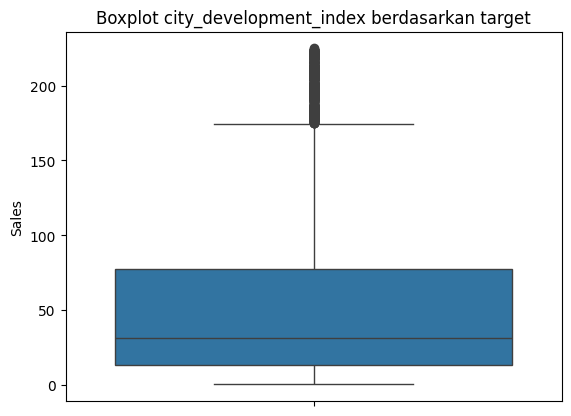

In [24]:
threshold5 = 225
outliers5 = df[(df['Sales'] > threshold5)]
df = df.drop(outliers5.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

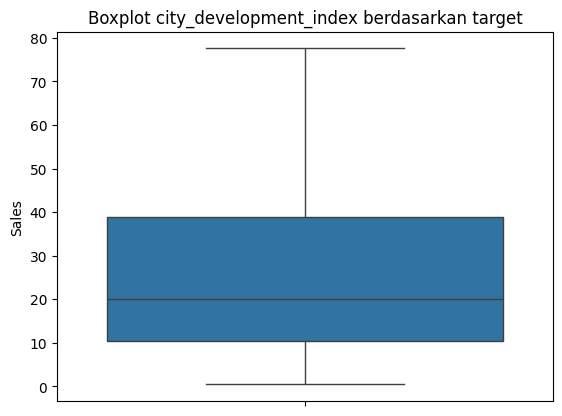

In [25]:
Q3 = df['Sales'].quantile(0.75)
threshold6 = Q3
outliers6 = df[(df['Sales'] > threshold6)]
df = df.drop(outliers6.index)
sns.boxplot(y='Sales', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

Kini sudah tidak ada outliers. Kolom 'Sales' kemudian diuji kembali kenormalannya.

In [26]:
stats, pval=normaltest(df['Sales'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

tidak normal


Saya ingin mengetahui datatype, nullvalue, unique, dan unique sample pada setiap kolom.

In [27]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(5712, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date Key,int64,0,1147,"[20230124, 20200107]"
1,Country,object,0,47,"[Croatia, Indonesia]"
2,City,object,0,249,"[Bologna, Wollongong]"
3,Region,object,0,3,"[AMER, EMEA]"
4,Subregion,object,0,12,"[LATAM, EU]"
5,Customer,object,0,99,"[HonHai Precision Industry, Itochu]"
6,Industry,object,0,10,"[Communications, Retail]"
7,Segment,object,0,3,"[SMB, Enterprise]"
8,Product,object,0,13,"[ChatBot Plugin, SaaS Connector Pack]"
9,Sales,float64,0,2831,"[5.88, 17.568]"


In [28]:
df

,Date Key,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
2,20220613,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.620,2,0.0,6.8714
4,20211011,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.368,2,0.2,2.5164
5,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,SaaS Connector Pack,48.860,7,0.0,14.1694
6,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ChatBot Plugin,7.280,4,0.0,1.9656
8,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,FinanceHub,31.500,10,0.0,15.1200
9985,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,Support,55.600,4,0.0,16.1240
9986,20220930,United States,New York City,AMER,NAMER,Panasonic,Tech,SMB,Data Smasher,36.240,1,0.0,15.2208
9989,20200122,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,0.2,4.1028


Kemudian saya melakukan resetting index.

In [29]:
df.reset_index(drop=True, inplace=True)
df

,Date Key,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,20220613,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.620,2,0.0,6.8714
1,20211011,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.368,2,0.2,2.5164
2,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,SaaS Connector Pack,48.860,7,0.0,14.1694
3,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ChatBot Plugin,7.280,4,0.0,1.9656
4,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,FinanceHub,31.500,10,0.0,15.1200
5708,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,Support,55.600,4,0.0,16.1240
5709,20220930,United States,New York City,AMER,NAMER,Panasonic,Tech,SMB,Data Smasher,36.240,1,0.0,15.2208
5710,20200122,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,0.2,4.1028


Data sudah bersih. Selanjutnya adalah tahap data analysis.

## **Data Analysis**

Saya ingin mengetahui jumlah Sales pada setiap Country, Industry, Subregion, Segment, dan Product.

In [30]:
print(df.groupby('Country')['Sales'].sum())
print(df.groupby('Industry')['Sales'].sum())
print(df.groupby('Subregion')['Sales'].sum())
print(df.groupby('Segment')['Sales'].sum())
print(df.groupby('Product')['Sales'].sum())


Country
Argentina                2053.2200
Australia                6918.7480
Austria                   217.5700
Belgium                  1889.8370
Brazil                   3378.2720
Canada                   7363.9760
Chile                    3161.2280
China                    1341.9600
Colombia                  701.1900
Costa Rica                621.8700
Croatia                   184.3700
Czech Republic            675.9900
Denmark                   106.0800
Egypt                      22.3600
Finland                  2703.1500
France                   8671.2700
Germany                  5609.6920
Greece                    465.9800
Iceland                     6.2400
India                    2352.6100
Indonesia                 357.5900
Ireland                  1757.6400
Israel                    590.0700
Italy                    1369.1800
Japan                   14433.8672
Luxembourg               1541.5700
Mexico                   7237.2800
Netherlands               740.9640
New Zealand 

Saya melakukan sintesis kolom-kolom baru dengan kalkulasi menggunakan kolom-kolom sebelumnya yang dapat membantu proses analisis saya.

In [31]:
df['Potential Sales without Discount'] = df['Sales'] * (1/(1-df['Discount']))
df['Profit Margin'] = df['Profit']/df['Sales']
df['Expenses'] = df['Sales'] - df['Profit']
df['Price per Unit'] = df['Sales']/df['Quantity']
df

,Date Key,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Potential Sales without Discount,Profit Margin,Expenses,Price per Unit
0,20220613,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.620,2,0.0,6.8714,14.62,0.4700,7.7486,7.310
1,20211011,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.368,2,0.2,2.5164,27.96,0.1125,19.8516,11.184
2,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,SaaS Connector Pack,48.860,7,0.0,14.1694,48.86,0.2900,34.6906,6.980
3,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ChatBot Plugin,7.280,4,0.0,1.9656,7.28,0.2700,5.3144,1.820
4,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,18.504,3,0.2,5.7825,23.13,0.3125,12.7215,6.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,FinanceHub,31.500,10,0.0,15.1200,31.50,0.4800,16.3800,3.150
5708,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,Support,55.600,4,0.0,16.1240,55.60,0.2900,39.4760,13.900
5709,20220930,United States,New York City,AMER,NAMER,Panasonic,Tech,SMB,Data Smasher,36.240,1,0.0,15.2208,36.24,0.4200,21.0192,36.240
5710,20200122,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,0.2,4.1028,31.56,0.1625,21.1452,8.416


Saya melakukan save data kedalam negara2.csv

In [32]:
negara = pd.DataFrame(df['Country'])
negara.to_csv('negara2.csv')

## **Rumusan masalah 1: Perusahaan ingin mengetahui keterkaitan antara GDP per Capita dengan jumlah Sales**

In [33]:
df['Country'].unique()

array(['United States', 'Germany', 'Sweden', 'Japan', 'Turkey',
       'Costa Rica', 'France', 'Luxembourg', 'Philippines', 'India',
       'United Kingdom', 'Spain', 'Brazil', 'South Africa', 'Portugal',
       'Belgium', 'Australia', 'Russia', 'Netherlands', 'Mexico', 'Chile',
       'Canada', 'Singapore', 'New Zealand', 'Czech Republic',
       'Saudi Arabia', 'Argentina', 'South Korea', 'Finland', 'Israel',
       'Norway', 'Ireland', 'Poland', 'Ukraine', 'Italy', 'Greece',
       'China', 'United Arab Emirates', 'Austria', 'Croatia', 'Colombia',
       'Taiwan', 'Indonesia', 'Qatar', 'Denmark', 'Iceland', 'Egypt'],
      dtype=object)

In [34]:
df['Date Key'] = df['Date Key'].astype(str)
def extract_substring(value):
    return value[0:4]
df['Year'] = df['Date Key'].apply(extract_substring)
df['Year'].unique()

array(['2022', '2021', '2020', '2023'], dtype=object)

Data mengenai GDP per Capita diperoleh dari sumber eksternal.

In [35]:
masukan = pd.read_csv('gdp1.csv')
masukan1 = pd.read_csv('besaran.csv')
horizontal_concat = pd.concat([masukan, masukan1], axis=1)
display(horizontal_concat)

,Country,GDP Per Capita
0,Argentina,10939.517450
1,Australia,58886.000410
2,Austria,51526.126420
3,Belgium,48789.705740
4,Brazil,7846.053209
5,Canada,50224.929440
6,Chile,14922.764620
7,China,11915.479920
8,Colombia,6039.092985
9,Costa Rica,12638.445050


In [36]:
print(type(horizontal_concat))
jumlahsalespernegara = df.groupby('Country')['Sales'].sum()
jumlahsalespernegara.to_csv('jumlahsalespernegara.csv')
masukan2 = pd.read_csv('salespernegara.csv')
gabung = pd.concat([horizontal_concat, masukan2], axis=1)
gabung

<class 'pandas.core.frame.DataFrame'>


,Country,GDP Per Capita,Sales
0,Argentina,10939.517450,2053.2200
1,Australia,58886.000410,6918.7480
2,Austria,51526.126420,217.5700
3,Belgium,48789.705740,1889.8370
4,Brazil,7846.053209,3378.2720
5,Canada,50224.929440,7363.9760
6,Chile,14922.764620,3161.2280
7,China,11915.479920,1341.9600
8,Colombia,6039.092985,701.1900
9,Costa Rica,12638.445050,621.8700


Pengujian kenormalan data dilakukan pada GDP Per Capita dan Sales.

In [37]:
stats, pval=normaltest(gabung['Sales'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

stats, pval=normaltest(gabung['GDP Per Capita'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

tidak normal
tidak normal


Kedua dataset dinyatakan tidak normal.

Karena distribusi data tidak normal pada kedua variabel, maka metode spearman digunakan untuk menganalisis korelasi antara GDP Per Capita dan Sales

0.050359920231503395


<Axes: xlabel='GDP Per Capita', ylabel='Sales'>

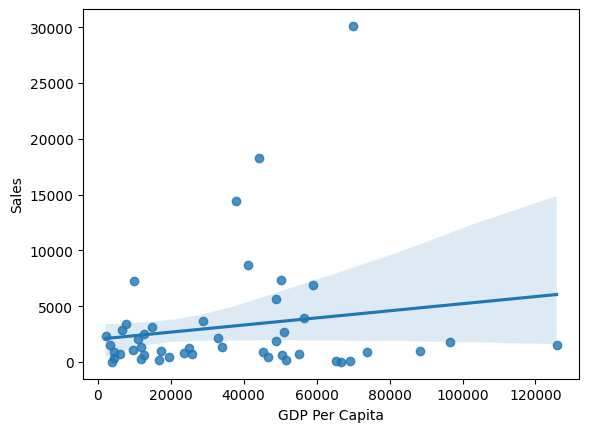

In [38]:
print(gabung['GDP Per Capita'].corr(gabung['Sales'], method='spearman'))
sns.regplot(data=gabung, x='GDP Per Capita', y='Sales')

Terdapat korelasi positif lemah antara GDP Per Capita dan Sales per Negara. 
Komponen GDP adalah
1. Konsumsi
2. Investasi
3. Pengeluaran Pemerintah
4. Ekspor
5. Impor

Hal ini dikarenakan tidak semua negara memiliki komponen konsumsi pada GDP per Capita yang besar.

## **Rumusan Masalah 2: Perusahaan ingin mengetahui apakah perusahaan telah mencapai economies of scale melalui keterkaitan antara produk terjual dengan pengeluaran**

Pengujian kenormalan data dilakukan untuk jumlah barang terjual (Quantity) dan pengeluaran (Expenses)

In [39]:
masukan3 = df.groupby('Product')[['Quantity']].sum()
masukan4 = df.groupby('Product')[['Expenses']].sum()
gabung1 = pd.concat([masukan3, masukan4], axis=1)
gabung1

stats, pval=normaltest(gabung1['Quantity'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

stats, pval=normaltest(gabung1['Expenses'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

distribusi normal
distribusi normal


Data memenuhi distribusi parametrik, terbukti dari persebaran data yang terdistribusi normal. Proses analisis korelasi antara keduanya dapat dilakukan secara langsung menggunakan corr.

np.float64(0.8853734865534207)

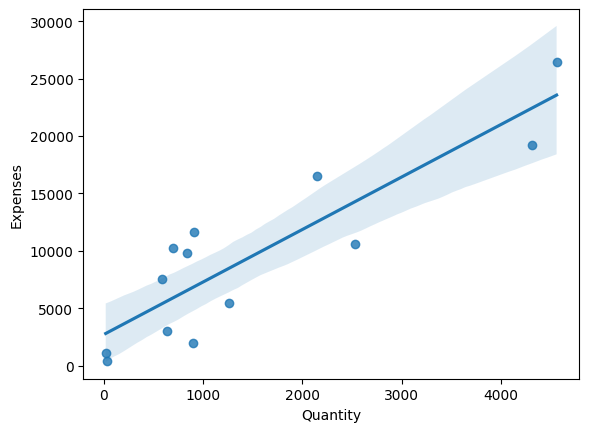

In [40]:
sns.regplot(data=gabung1, x='Quantity', y='Expenses')
gabung1['Quantity'].corr(gabung1['Expenses'])

Grafik menunjukkan bahwa jumlah barang yang terjual berbanding lurus dengan pengeluaran. Hal ini senada dengan teori manajemen operasional, dimana pengeluaran bertambah seiring dengan peningkatan jumlah barang terjual. Hal ini membuktikan pula economies of scale belum tercapai.

## **Rumusan Masalah 3: Perusahaan ingin mengetahui apakah perusahaan perlu untuk memfokuskan penjualan pada subregion tertentu saja melalui budget untuk marketing**

Saya menjawab rumusan masalah 3 ini menggunakan f_oneway.

In [41]:
df['Subregion'].unique()
from scipy.stats import f_oneway

stat, pvalue = f_oneway(df[df['Subregion'] == 'NAMER']['Sales'],
                        df[df['Subregion'] == 'EU-WEST']['Sales'],
                        df[df['Subregion'] == 'NOR']['Sales'],
                        df[df['Subregion'] == 'JAPN']['Sales'],
                        df[df['Subregion'] == 'MEA']['Sales'],
                        df[df['Subregion'] == 'LATAM']['Sales'],
                        df[df['Subregion'] == 'APAC']['Sales'],
                        df[df['Subregion'] == 'IND']['Sales'],
                        df[df['Subregion'] == 'UKIR']['Sales'],
                        df[df['Subregion'] == 'ANZ']['Sales'],
                        df[df['Subregion'] == 'EU-EAST']['Sales'],
                        df[df['Subregion'] == 'EU']['Sales']
                        )

stat, pvalue

(np.float64(5.493932164795632), np.float64(8.649324190138948e-09))

In [42]:
[df[df['Subregion'] == i]['Sales'].mean() for i in df['Subregion'].unique()]

[np.float64(27.58579249448124),
 np.float64(25.231852272727274),
 np.float64(27.340032374100723),
 np.float64(22.730499527559058),
 np.float64(26.020184873949585),
 np.float64(26.18787786259542),
 np.float64(27.859636363636362),
 np.float64(30.16166666666667),
 np.float64(28.708575931232087),
 np.float64(22.186059880239522),
 np.float64(27.07831914893617),
 np.float64(27.383599999999998)]

Rerata sales pada setiap subregion tidak terlalu terpaut jauh. Perusahaan mungkin sebaiknya mengalokasikan anggaran marketing secara even pada setiap subregion.

## **Rumusan Masalah 4: Perusahaan ingin mengetahui apakah industri dan produk terjual saling terkait.**

Pertanyaan mengenai apakah suatu industri menyukai produk-produk tertentu akan terjawab pada analisis menggunakan kodingan dibawah ini.

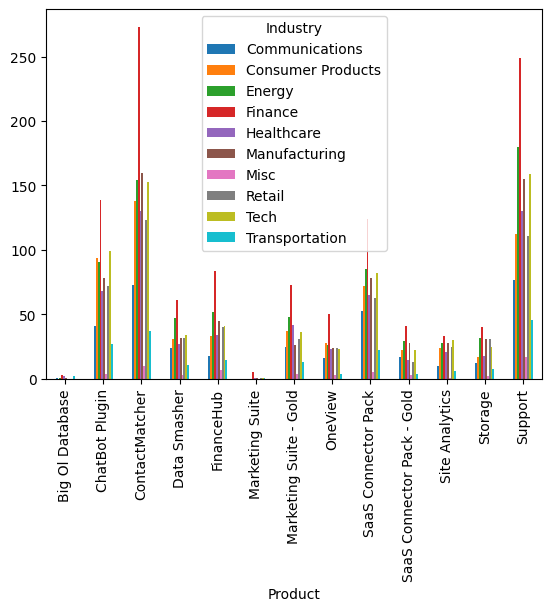

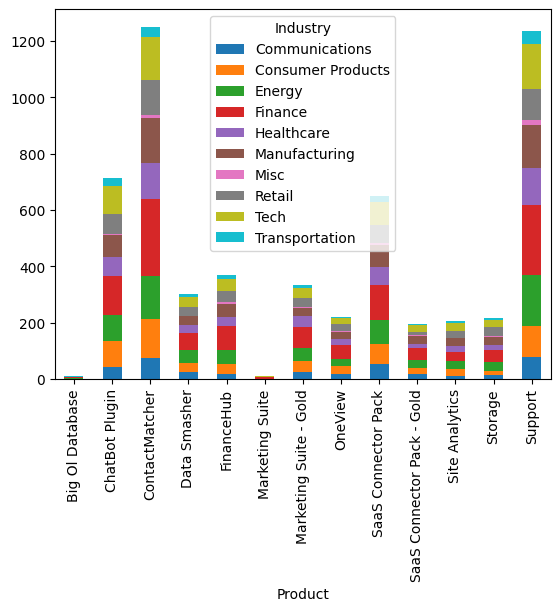

In [43]:
dfc = pd.crosstab(df['Product'],df['Industry'])
dfc.plot(kind='bar');
dfc.plot(kind='bar', stacked=True);

In [44]:
from scipy.stats import chi2_contingency
chi2_contingency(dfc)
stats, pvalue, dof, expected = chi2_contingency(dfc)
pvalue
# conclusion

# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa Industru memiliki keterkaitan dengan Produk. 
          meningkat dibandingkan pembelian pada design yang lama.
          (Proporsinya tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa Industri memiliki keterkaitan dengan Produk. 
          (Proporsinya berbeda signinfikan)''')

pvalue = 0.7733572339503618. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa Industru memiliki keterkaitan dengan Produk. 
          meningkat dibandingkan pembelian pada design yang lama.
          (Proporsinya tidak berbeda signinfikan)


Setiap industri tidak memiliki preferensi tertentu pada produk spesifik.

## **Rumusan Masalah 5: Perusahaan ingin mengetahui produk-produk apa saja yang memiliki elastisitas harga terhadap demand yang rendah**

In [66]:
df

,Date Key,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Potential Sales without Discount,Profit Margin,Expenses,Price per Unit,Year
0,20220613,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.620,2,0.0,6.8714,14.62,0.4700,7.7486,7.310,2022
1,20211011,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.368,2,0.2,2.5164,27.96,0.1125,19.8516,11.184,2021
2,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,SaaS Connector Pack,48.860,7,0.0,14.1694,48.86,0.2900,34.6906,6.980,2020
3,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ChatBot Plugin,7.280,4,0.0,1.9656,7.28,0.2700,5.3144,1.820,2020
4,20200609,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,18.504,3,0.2,5.7825,23.13,0.3125,12.7215,6.168,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,FinanceHub,31.500,10,0.0,15.1200,31.50,0.4800,16.3800,3.150,2021
5708,20210517,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,Healthcare,SMB,Support,55.600,4,0.0,16.1240,55.60,0.2900,39.4760,13.900,2021
5709,20220930,United States,New York City,AMER,NAMER,Panasonic,Tech,SMB,Data Smasher,36.240,1,0.0,15.2208,36.24,0.4200,21.0192,36.240,2022
5710,20200122,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,0.2,4.1028,31.56,0.1625,21.1452,8.416,2020


In [159]:
dfd = df.groupby(['Year', 'Product'])['Quantity'].sum()
dfd
dfe = df.groupby(['Year', 'Product'])['Price per Unit'].mean()
dfe
inflation2020 = 1.012
inflation2021 = 1.047
inflation2022 = 1.08
inflation2023 = 1.041
# Step 2: Initialize an empty list for kosongan (presumably to store calculated differences)
kosongan = []

# # Step 3: Adjust your loop to ensure it iterates properly over the grouped data.
# # You should use the index of dfd for proper slicing.
for i in range(13):  # Ensure we don't go out of bounds
    DeltaQ = dfd.iloc[i + 13] - dfd.iloc[i]
    Q = dfd.iloc[i]
    DeltaP = (dfe.iloc[i + 13])/inflation2020 - dfe.iloc[i]
    P = dfe.iloc[i]
    Price_Elasticity2020 = (DeltaQ/Q)/(DeltaP/P)
    kosongan.append([DeltaQ, Q, DeltaP, P, Price_Elasticity2020])

# # Step 4: Create a DataFrame for the calculated differences
isian = pd.DataFrame(kosongan, columns=['Delta Q', 'Q', 'Delta P', 'P', 'Price Elasticity2020'])
isian

kosongan1 = []

for i in range(13, 26, 1):  # Ensure we don't go out of bounds
    DeltaQ1 = dfd.iloc[i + 13] - dfd.iloc[i]
    Q1 = dfd.iloc[i]
    DeltaP1 = (dfe.iloc[i + 13])/inflation2021 - dfe.iloc[i]
    P1 = dfe.iloc[i]
    Price_Elasticity2021 = (DeltaQ1/Q1)/(DeltaP1/P1)
    kosongan1.append([DeltaQ1, Q1, DeltaP1, P1, Price_Elasticity2021])

isian1 = pd.DataFrame(kosongan1, columns=['Delta Q', 'Q', 'Delta P', 'P', 'Price Elasticity2021'])
isian1

kosongan2 = []

for i in range(26, 39, 1):  # Ensure we don't go out of bounds
    DeltaQ2 = dfd.iloc[i + 13] - dfd.iloc[i]
    Q2 = dfd.iloc[i]
    DeltaP2 = (dfe.iloc[i + 13])/inflation2021 - dfe.iloc[i]
    P2 = dfe.iloc[i]
    Price_Elasticity2022 = (DeltaQ2/Q2)/(DeltaP2/P2)
    kosongan2.append([DeltaQ2, Q2, DeltaP2, P2, Price_Elasticity2022])

isian2 = pd.DataFrame(kosongan2, columns=['Delta Q', 'Q', 'Delta P', 'P', 'Price Elasticity2022'])
isian2

kosongan3 = []

for i in range(0,13,1):
    rerata_PE = (isian.iloc[i][4] + isian1.iloc[i][4] + isian2.iloc[i][4])/3
    kosongan3.append([rerata_PE])

isian3 = pd.DataFrame(kosongan3, columns=['Rerata PE'])
print(isian3)

print(df['Product'].unique())

df.to_excel('input_tablu.xlsx')

    Rerata PE
0   -0.122287
1   -2.290959
2    3.391441
3   -2.562569
4   -0.861561
5   -4.392619
6   -0.342249
7   -0.797993
8   -0.242482
9   -0.467038
10   1.339984
11  -2.201854
12  -2.078010
['FinanceHub' 'Marketing Suite - Gold' 'SaaS Connector Pack'
 'ChatBot Plugin' 'ContactMatcher' 'Support' 'OneView'
 'SaaS Connector Pack - Gold' 'Data Smasher' 'Site Analytics' 'Storage'
 'Big Ol Database' 'Marketing Suite']


## **Kesimpulan**

1. GDP Per Capita memiliki keterkaitan positif yang lemah terhadap Sales dikarenakan tidak semua komponen GDP dipengaruhi oleh komponen konsumsi.
2. Perusahaan belum mencapai economies of scale terbukti dari korelasi yang kuat antara produk terjual dengan pengeluaran.
3. Rerata Sales untuk subregion-subregion cenderung tidak berbeda jauh.
4. Setiap industri tidak memiliki preferensi spesifik terhadap produk-produk yang ditawarkan oleh SaaS.
5. 'FinanceHub', 'ContactMatcher', 'OneView', 'SaaS Connector Pack - Gold', "Data Smasher', dan 'Site Analytics" adalah produk-produk yang tidak berubah demandnya secara signifikan karena elastisitas harga dari demand nya kurang dari -1. 'SaaS Connector Pack' dan 'Storage' termasuk barang luxury karena peningkatan harga akan meningkatkan demand. Sisanya adalah barang-barang yang sangat terpengaruh oleh perubahan harga karena elastisitas harga dari demand nya kurang dari -1.


## **Rekomendasi**

1. Keterkaitan positif yang lemah antara GDP Per Capita dan Sales ini dapat menjadi salah satu pertimbangan didalam mengalokasikan anggaran marketing produk secara proporsional dengan GDP per Capita setiap negara, namun tidak dapat menjadi pertimbangan tunggal, karena besaran korelasinya bukan 1.
2. Perusahaan sebaiknya melakukan standarisasi proses bisnis dan mempergunakan teknologi berupa mesin atau komputer yang lebih produktif agar pengeluaran dapat menurun seiring dengan pertambahan produk terjual.
3. Sebaiknya perusahaan mengalokasikan dana untuk marketing initiative secara even kepada subregion-subregion.
4. Sebaiknya perusahaan terus menawarkan ragam produk yang sama kepada industri-industri tanpa melakukan diskriminasi industri tentang halnya penawaran produk-produk tertentu saja.
5. Perusahaan dapat meningkatkan harga pada produk-produk yang elastisitas harga dari demand nya lebih dari -1 (0 > x > -1) tanpa perlu khawatir demand akan menurun secara berarti agar sales dapat meningkat.
